**Notable random states -**
* 160 - Perfect accuracy for rbf and polynomial models for SVM
* 852 - Very good accuracy for most models except than sigmoid SVM
* 80 - Perfect accuracy for decision tree model
* 97 - Very good accuracies for KNN, rbf, and poly; perfect accuracy for decision tree model; above average accuracy for sigmoid

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree, svm
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
import random as rand

pokemon = pd.read_csv("https://raw.githubusercontent.com/abdiitat/pokemon-umn-ml-camp/main/pokemon%20-%20pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
pokemon.describe(include = 'all')

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,703.000000,801.000000,801.000000,801.000000,801.000000,801,417,781.000000,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,18,NaN,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,water,flying,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,114,95,NaN,NaN,NaN
mean,NaN,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,...,55.155761,401.000000,71.305868,70.911361,66.334582,NaN,NaN,61.378105,3.690387,0.089888
std,NaN,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,...,20.261623,231.373075,32.353826,27.942501,28.907662,NaN,NaN,109.354766,1.930420,0.286199
min,NaN,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,...,0.000000,1.000000,10.000000,20.000000,5.000000,NaN,NaN,0.100000,1.000000,0.000000
25%,NaN,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,...,50.000000,201.000000,45.000000,50.000000,45.000000,NaN,NaN,9.000000,2.000000,0.000000
50%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,50.000000,401.000000,65.000000,66.000000,65.000000,NaN,NaN,27.300000,4.000000,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,50.000000,601.000000,91.000000,90.000000,85.000000,NaN,NaN,64.800000,5.000000,0.000000


In [ ]:
print(len(list(pokemon['attack'].values)))
print(len(list(pokemon['sp_attack'].values)))
print(len(list(pokemon['base_total'].values)))
print(len(list(pokemon['base_egg_steps'].values)))

801
801
801
801


In [ ]:
pokemon.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [ ]:
pokemon.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [ ]:
stats = ['attack', 'sp_attack', 'base_total', 'base_egg_steps']

x = pokemon[stats].values
y = pokemon["is_legendary"].values
yReg = pokemon["is_legendary"].values.reshape(-1,1)
a = rand.randint(1, 1000)
print(a)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = a)

949


# k-Nearest Neighbours Algorithm

In [ ]:
kClassifier = KNeighborsClassifier(n_neighbors=1)
kClassifier.fit(x_train, y_train)
yKNN_pred = kClassifier.predict(x_test)

In [ ]:
confusion_matrix(y_test, yKNN_pred)

array([[146,   1],
       [  1,  13]])

In [ ]:
accuracy_score(y_test, yKNN_pred)

0.9875776397515528

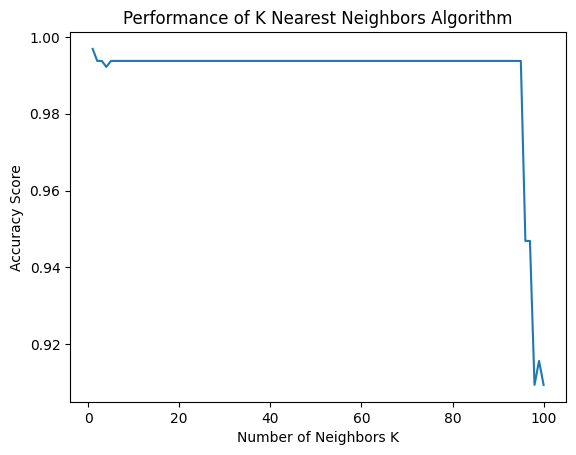

1


In [ ]:
k_list = list(range(1, 101))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv = StratifiedKFold(n_splits=10, shuffle=True), scoring = 'accuracy')
    cv_scores.append(scores.mean())

plt.figure()
plt.title('Performance of K Nearest Neighbors Algorithm')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
plt.plot(k_list, cv_scores)

plt.show()

print(k_list[cv_scores.index(max(cv_scores))])

# Decision Tree Algorithm

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
ydt_pred = dt.predict(x_test)

In [ ]:
confusion_matrix(y_test, ydt_pred)

array([[146,   1],
       [  1,  13]])

In [ ]:
accuracy_score(y_test, ydt_pred)

0.9875776397515528

In [ ]:
ydt_train_pred = dt.predict(x_train)

In [ ]:
accuracy_score(y_train, ydt_train_pred)

1.0

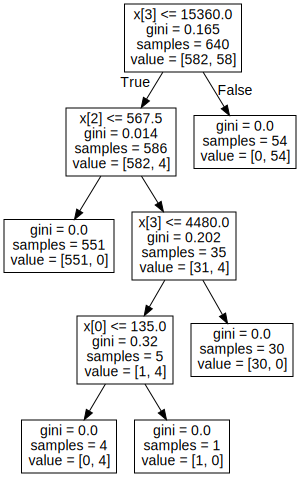

In [ ]:
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
print(stats[1])
print(stats[2])
print(stats[3])

sp_attack
base_total
base_egg_steps


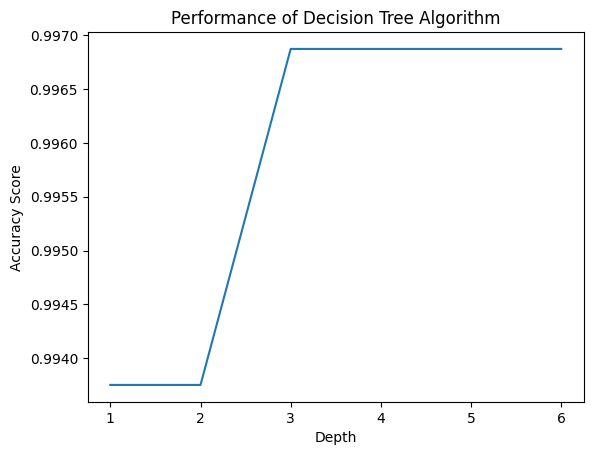

3


In [ ]:
dtmax_list = list(range(1, 7))
cv_scores = []

for d in dtmax_list:
    dmax = tree.DecisionTreeClassifier(max_depth = d)
    scores = cross_val_score(dmax, x_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

plt.figure()
plt.title('Performance of Decision Tree Algorithm')
plt.xlabel('Depth')
plt.ylabel('Accuracy Score')
plt.plot(dtmax_list, cv_scores)

plt.show()

print(dtmax_list[cv_scores.index(max(cv_scores))])

# Random Forest Algorithm

In [ ]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
yrf_pred = rf.predict(x_test)

In [ ]:
confusion_matrix(y_test, yrf_pred)

array([[147,   0],
       [  2,  12]])

In [ ]:
accuracy_score(y_test, yrf_pred)

0.9875776397515528

# Support Vector Machine Algorithm

In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
poly_svc = svm.SVC(kernel='poly')
sigmoid_svc = svm.SVC(kernel='sigmoid')

rbf_svc = rbf_svc.fit(x_train, y_train)
poly_svc = poly_svc.fit(x_train, y_train)
sigmoid_svc = sigmoid_svc.fit(x_train, y_train)

In [ ]:
rbf_pred = rbf_svc.predict(x_test)
poly_pred = poly_svc.predict(x_test)
sigmoid_pred = sigmoid_svc.predict(x_test)

In [ ]:
confusion_matrix(y_test, rbf_pred)

array([[147,   0],
       [  3,  11]])

In [ ]:
confusion_matrix(y_test, poly_pred)

array([[147,   0],
       [  3,  11]])

In [ ]:
confusion_matrix(y_test, sigmoid_pred)

array([[147,   0],
       [ 14,   0]])

In [ ]:
print("Accuracy score for rbf model: " + str(accuracy_score(y_test, rbf_pred)))
print("Accuracy score for poly model: " + str(accuracy_score(y_test, poly_pred)))
print("Accuracy score for sigmoid model: " + str(accuracy_score(y_test, sigmoid_pred)))

Accuracy score for rbf model: 0.9813664596273292
Accuracy score for poly model: 0.9813664596273292
Accuracy score for sigmoid model: 0.9130434782608695


# Linear Regression

In [ ]:
mlr = LinearRegression()
mlr.fit(x, yReg)
yLinReg_pred = mlr.predict(x)

In [ ]:
model0_error = (yReg.mean() - yReg)

model1_error = (yLinReg_pred - yReg)


SSE0 = np.sum(model0_error**2)
SSE1 = np.sum(model1_error**2)

print("The R^2 for model 1 is ", 1 - SSE1/SSE0)

The R^2 for model 1 is  0.8029390301454435


# Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter = 10000)
log_reg = log_reg.fit(x, yReg.ravel())

In [ ]:
yLog_pred = log_reg.predict(x)

In [ ]:
confusion_matrix(yReg, yLog_pred)

array([[729,   0],
       [  7,  65]])

In [ ]:
accuracy_score(yReg, yLog_pred)

0.9912609238451935

In [ ]:
plt.figure()
sns.pairplot(pokemon, vars = ['attack', 'defense', 'sp_attack', "sp_defense", 'speed', 'hp', 'base_total', 'base_egg_steps'], hue = 'is_legendary')
plt.show()

Output hidden; open in https://colab.research.google.com to view.